## Customer Churn Prediction with Neural Networks

In [41]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
tel_data = pd.read_csv("Telco-Customer-Churn.csv")
tel_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(tel_data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


No missing values in the dataset

In [6]:
tel_data = tel_data.drop(columns=['customerID'])

In [7]:
cat_cols = []
for column in tel_data.columns:
    if tel_data[column].dtypes == 'object':
        cat_cols.append(column)

print(cat_cols)


['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in cat_cols:
    tel_data[col] = label_encoder.fit_transform(tel_data[col])



In [9]:
print(tel_data)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

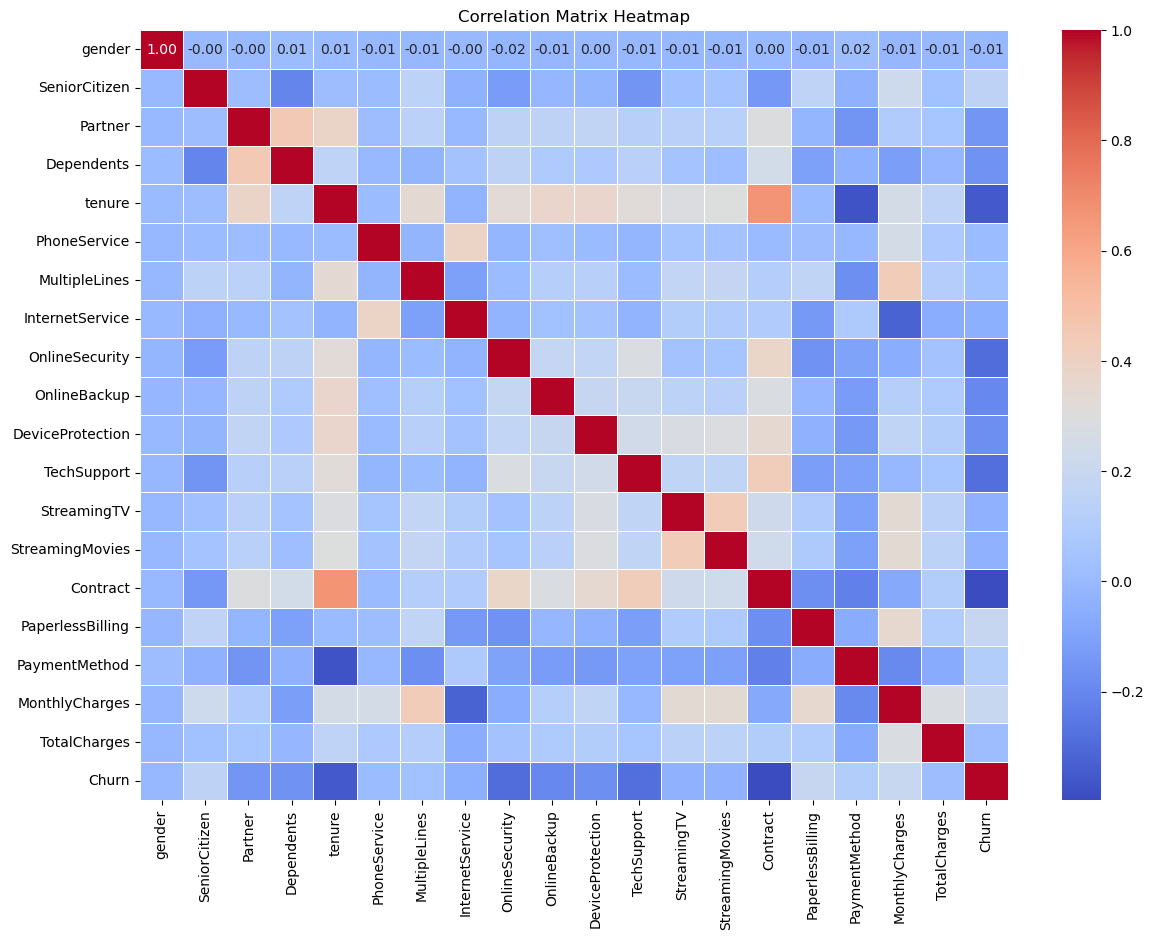

In [10]:
corr = tel_data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

num_col = tel_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
tel_data[num_col] = scaler.fit_transform(tel_data[num_col])

c:\Conda_Installation\envs\DeepL_ENV\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Conda_Installation\envs\DeepL_ENV\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Conda_Installation\envs\DeepL_ENV\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Conda_Installation\envs\DeepL_ENV\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

In [14]:
predictors = tel_data.drop(columns=['Churn'])
targets = tel_data['Churn']

In [16]:
from sklearn.model_selection import train_test_split
pred_train,pred_test,target_train,target_test = train_test_split(predictors,targets,test_size=0.3,random_state=42)

### Baseline Model without Dropouts

In [19]:
base_model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(12, activation='relu', input_shape=(pred_train.shape[1],)),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

base_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
print(pred_test.shape)
print(pred_train.shape)
print(target_test.shape)
print(target_train.shape)

(2113, 19)
(4930, 19)
(2113,)
(4930,)


In [23]:
base_model_training = base_model.fit(pred_train, target_train, epochs=30, batch_size=32, validation_data=(pred_test, target_test))

Epoch 1/30
155/155 [==============================] - 2s 11ms/step - loss: 0.8020 - accuracy: 0.6844 - val_loss: 1.6173 - val_accuracy: 0.4004
Epoch 2/30
155/155 [==============================] - 1s 7ms/step - loss: 0.7301 - accuracy: 0.7162 - val_loss: 0.5939 - val_accuracy: 0.6971
Epoch 3/30
155/155 [==============================] - 1s 8ms/step - loss: 0.5681 - accuracy: 0.7448 - val_loss: 0.5096 - val_accuracy: 0.7421
Epoch 4/30
155/155 [==============================] - 1s 8ms/step - loss: 0.5609 - accuracy: 0.7408 - val_loss: 0.5326 - val_accuracy: 0.7364
Epoch 5/30
155/155 [==============================] - 2s 11ms/step - loss: 0.6715 - accuracy: 0.7270 - val_loss: 0.9069 - val_accuracy: 0.7388
Epoch 6/30
155/155 [==============================] - 1s 9ms/step - loss: 0.6688 - accuracy: 0.7325 - val_loss: 0.6591 - val_accuracy: 0.7506
Epoch 7/30
155/155 [==============================] - 1s 8ms/step - loss: 0.5539 - accuracy: 0.7550 - val_loss: 0.5232 - val_accuracy: 0.7586
Epoc

### Model with Dropout Layers

In [24]:
dr_base_model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(12, activation='relu', input_shape=(pred_train.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])


dr_base_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
dr_base_model_training = dr_base_model.fit(pred_train, target_train, epochs=30, batch_size=32, validation_data=(pred_test, target_test))

Epoch 1/30
155/155 [==============================] - 2s 7ms/step - loss: 228.8415 - accuracy: 0.5158 - val_loss: 7.0409 - val_accuracy: 0.7260
Epoch 2/30
155/155 [==============================] - 1s 5ms/step - loss: 93.0787 - accuracy: 0.5886 - val_loss: 7.5398 - val_accuracy: 0.7269
Epoch 3/30
155/155 [==============================] - 1s 5ms/step - loss: 40.9868 - accuracy: 0.6026 - val_loss: 4.8800 - val_accuracy: 0.7269
Epoch 4/30
155/155 [==============================] - 1s 6ms/step - loss: 16.5998 - accuracy: 0.6300 - val_loss: 0.6553 - val_accuracy: 0.7269
Epoch 5/30
155/155 [==============================] - 1s 8ms/step - loss: 7.0573 - accuracy: 0.6621 - val_loss: 0.6054 - val_accuracy: 0.7269
Epoch 6/30
155/155 [==============================] - 1s 9ms/step - loss: 4.1299 - accuracy: 0.6844 - val_loss: 0.6000 - val_accuracy: 0.7279
Epoch 7/30
155/155 [==============================] - 1s 9ms/step - loss: 2.6852 - accuracy: 0.6921 - val_loss: 0.5936 - val_accuracy: 0.7279
E

### Layer-wise Dropout NN

In [26]:
layer_dr_model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(12, activation='relu', input_shape=(pred_train.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

layer_dr_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
layer_dr_model_training = layer_dr_model.fit(pred_train, target_train, epochs=30, batch_size=32, validation_data=(pred_test, target_test))

Epoch 1/30
155/155 [==============================] - 3s 11ms/step - loss: 36.0827 - accuracy: 0.6803 - val_loss: 0.6621 - val_accuracy: 0.7283
Epoch 2/30
155/155 [==============================] - 1s 8ms/step - loss: 9.9358 - accuracy: 0.7174 - val_loss: 0.6393 - val_accuracy: 0.7283
Epoch 3/30
155/155 [==============================] - 1s 8ms/step - loss: 5.6037 - accuracy: 0.7241 - val_loss: 0.6214 - val_accuracy: 0.7283
Epoch 4/30
155/155 [==============================] - 1s 8ms/step - loss: 2.6577 - accuracy: 0.7300 - val_loss: 0.6084 - val_accuracy: 0.7283
Epoch 5/30
155/155 [==============================] - 1s 8ms/step - loss: 1.6830 - accuracy: 0.7296 - val_loss: 0.5996 - val_accuracy: 0.7283
Epoch 6/30
155/155 [==============================] - 1s 8ms/step - loss: 1.2398 - accuracy: 0.7337 - val_loss: 0.5938 - val_accuracy: 0.7283
Epoch 7/30
155/155 [==============================] - 2s 10ms/step - loss: 0.8515 - accuracy: 0.7351 - val_loss: 0.5901 - val_accuracy: 0.7283
Epo

### Training Accuracy

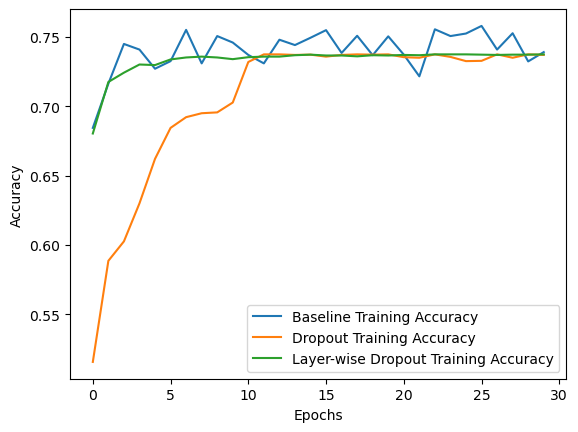

In [36]:
plt.plot(base_model_training.history['accuracy'], label='Baseline Training Accuracy')
plt.plot(dr_base_model_training.history['accuracy'], label='Dropout Training Accuracy')
plt.plot(layer_dr_model_training.history['accuracy'], label='Layer-wise Dropout Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Training Loss

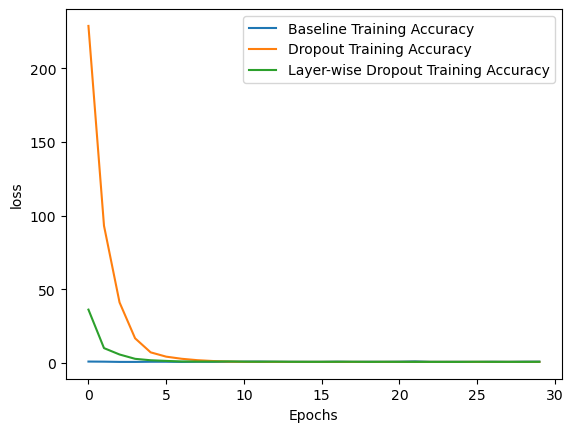

In [37]:
plt.plot(base_model_training.history['loss'], label='Baseline Training Accuracy')
plt.plot(dr_base_model_training.history['loss'], label='Dropout Training Accuracy')
plt.plot(layer_dr_model_training.history['loss'], label='Layer-wise Dropout Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Monte Carlo Dropout NN

In [31]:
class Monte_Carlo_Drop(tf.keras.models.Model):
    def __init__(self, drop_rate=0.3):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dropout1 = tf.keras.layers.Dropout(drop_rate)
        self.dense2 = tf.keras.layers.Dense(32, activation='relu')
        self.dropout2 = tf.keras.layers.Dropout(drop_rate)
        self.dense3 = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        if training:
            x = self.dropout1(x, training=True)  # Dropout during training
        else:
            x = self.dropout1(x, training=False)  # No dropout during inference
        x = self.dense2(x)
        if training:
            x = self.dropout2(x, training=True)  # Dropout during training
        else:
            x = self.dropout2(x, training=False)  # No dropout during inference
        return self.dense3(x)

In [32]:
monte_carlo_model = Monte_Carlo_Drop()

monte_carlo_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
monte_carlo_model_training = monte_carlo_model.fit(pred_train, target_train, epochs=30, batch_size=32, validation_data=(pred_test, target_test))

Epoch 1/30
155/155 [==============================] - 5s 15ms/step - loss: 30.8380 - accuracy: 0.6006 - val_loss: 0.6530 - val_accuracy: 0.7283
Epoch 2/30
155/155 [==============================] - 1s 9ms/step - loss: 4.1862 - accuracy: 0.6635 - val_loss: 0.6101 - val_accuracy: 0.7283
Epoch 3/30
155/155 [==============================] - 1s 9ms/step - loss: 1.5953 - accuracy: 0.7037 - val_loss: 0.6378 - val_accuracy: 0.7283
Epoch 4/30
155/155 [==============================] - 1s 9ms/step - loss: 1.0125 - accuracy: 0.7164 - val_loss: 0.6027 - val_accuracy: 0.7283
Epoch 5/30
155/155 [==============================] - 1s 9ms/step - loss: 0.8517 - accuracy: 0.7272 - val_loss: 0.6058 - val_accuracy: 0.7283
Epoch 6/30
155/155 [==============================] - 1s 9ms/step - loss: 0.8346 - accuracy: 0.7304 - val_loss: 0.6047 - val_accuracy: 0.7283
Epoch 7/30
155/155 [==============================] - 1s 10ms/step - loss: 0.7166 - accuracy: 0.7335 - val_loss: 0.6007 - val_accuracy: 0.7283
Epo

### Training Accuracy

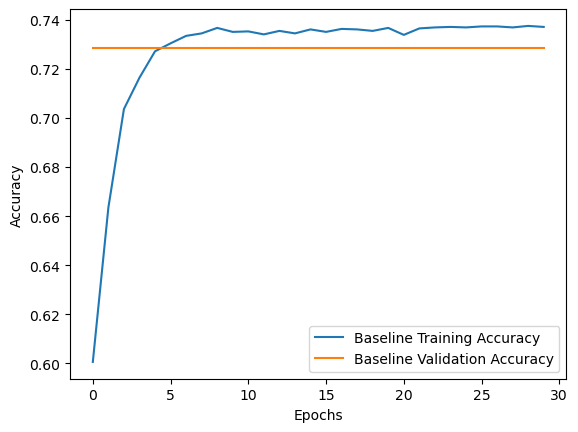

In [34]:
plt.plot(monte_carlo_model_training.history['accuracy'], label='Baseline Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Training Loss

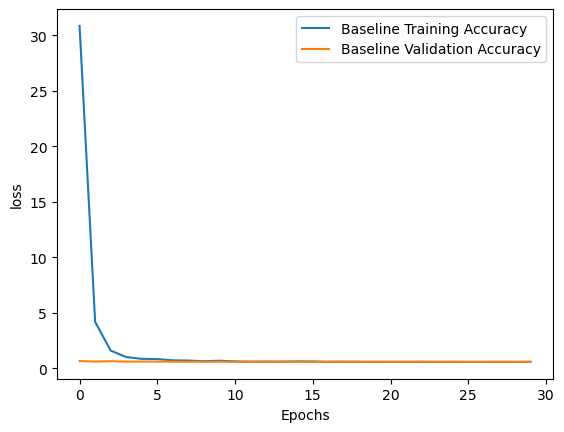

In [35]:
plt.plot(monte_carlo_model_training.history['loss'], label='Baseline Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [39]:
baseline_predictions = base_model.predict(pred_test)
baseline_predictions = (baseline_predictions > 0.5).astype("int32")

dropout_predictions = dr_base_model.predict(pred_test)
dropout_predictions = (dropout_predictions > 0.5).astype("int32")

layerwise_dropout_predictions = layer_dr_model.predict(pred_test)
layerwise_dropout_predictions = (layerwise_dropout_predictions > 0.5).astype("int32")

monte_dropout_predictions = monte_carlo_model.predict(pred_test)
monte_dropout_predictions = (monte_dropout_predictions > 0.5).astype("int32")

67/67 [==============================] - 0s 4ms/step


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define lists to hold metrics for each model
models = ['Baseline', 'Dropout', 'Layer-wise Dropout', 'Monte Carlo Dropout']
predictions = [baseline_predictions, dropout_predictions, layerwise_dropout_predictions, monte_dropout_predictions]

# Loop through each model and compute metrics
for i, model_name in enumerate(models):
    print(f"\nMetrics for {model_name} Model:")
    accuracy = accuracy_score(target_test, predictions[i])
    precision = precision_score(target_test, predictions[i])
    recall = recall_score(target_test, predictions[i])
    f1 = f1_score(target_test, predictions[i])
    roc_auc = roc_auc_score(target_test, predictions[i])

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)

    # Confusion matrix
    conf_matrix = confusion_matrix(target_test, predictions[i])
    print("Confusion Matrix:")
    print(conf_matrix)



Metrics for Baseline Model:
Accuracy: 0.8021769995267393
Precision: 0.6397849462365591
Recall: 0.6219512195121951
F1 Score: 0.6307420494699646
ROC AUC Score: 0.745673465506585
Confusion Matrix:
[[1338  201]
 [ 217  357]]

Metrics for Dropout Model:
Accuracy: 0.7283483199242783
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5
Confusion Matrix:
[[1539    0]
 [ 574    0]]

Metrics for Layer-wise Dropout Model:
Accuracy: 0.7283483199242783
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5
Confusion Matrix:
[[1539    0]
 [ 574    0]]

Metrics for Monte Carlo Dropout Model:
Accuracy: 0.7283483199242783
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5
Confusion Matrix:
[[1539    0]
 [ 574    0]]


Baseline Model Performance: Of all the models, the baseline model performs best in terms of accuracy, precision, recall, F1 score, and ROC AUC score. This shows that both the positive class (churned consumers) and the negative class (retained customers) are being properly served by the baseline model.

Performance Metrics for Dropout Models: The performance metrics for the Dropout model, Layer-wise Dropout model, and Monte Carlo Dropout model are the same. They can't accurately forecast any of the positive class cases (churned consumers), and their accuracy is worse than that of the baseline model.

Ineffectiveness of Dropout: In this case, applying dropout (including Monte Carlo Dropout) does not improve the model’s performance. Instead, it seems to worsen the model’s ability to predict customer churn.